In [1]:
import data_retrieval_utils as dru
import matplotlib.pyplot as plt
from run_dict import RUN_DICT, BASELINE_ALG, ML_ONLY_ALG, OCSVM_ALG, CUTOFF

/home/claytons/miniconda3/envs/fv3net/lib/python3.8/site-packages/google/auth/_default.py:70: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [2]:
gammas = {
    8/79: r"$\gamma = \frac{8}{79}$",
    4/79: r"$\gamma = \frac{4}{79}$",
    2/79: r"$\gamma = \frac{2}{79}$",
    1/79: r"$\gamma = \frac{1}{79}$",
}

In [3]:
ocsvm_names = {gamma: dru.get_names_alg(OCSVM_ALG, gamma=gamma) for gamma in gammas}
ocsvm_cutoffs = {gamma: [RUN_DICT[i][CUTOFF] for i in RUN_DICT if i in ocsvm_names[gamma]]
                 for gamma in gammas}

ocsvm_names_bl_ml = {gamma: dru.get_names_alg(OCSVM_ALG, gamma=gamma, has_baseline_ml_only=True) for gamma in gammas}

In [4]:
metric_strs = ["rmse_of_time_mean/tmp850", "rmse_of_time_mean/total_precip_to_surface", "rmse_of_time_mean/pwat"]
metric_names = ["RMSE T (K)", "RMSE SP (mm/day)", "RMSE PWAT (kg/$\mathrm{m}^2)$"]

In [5]:
metrics = dru.get_metrics(RUN_DICT)
novelty_fractions = dru.get_novelty_fractions(RUN_DICT)

### Single-plot comparison figure with percent novelties as x axis

<ipython-input-8-dc3a1bcee570>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 1, i+1)


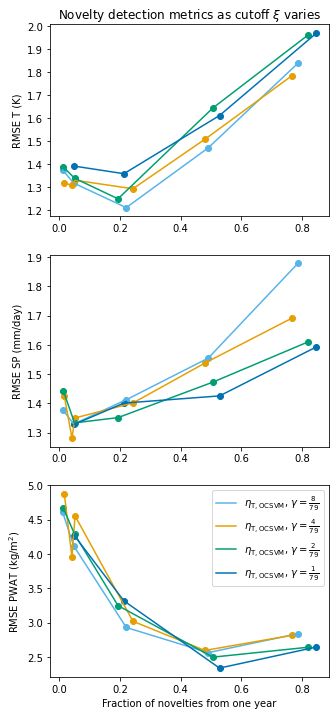

In [8]:
fig = plt.figure(figsize=(5, 12))
for gamma in gammas:
    for i, metric_str in enumerate(metric_strs):
        ax = plt.subplot(3, 1, i+1)
        metric = [metrics[j][metric_str]["value"] for j in ocsvm_names[gamma]]
        novelty_fracs, metric_online = zip(*sorted(zip([novelty_fractions[name] for name in ocsvm_names[gamma]], metric)))
        ax.plot(novelty_fracs, metric_online, label=r"$\eta_{\mathrm{T, OCSVM}}$, " +  gammas[gamma] + r"")
        ax.scatter([novelty_fractions[name] for name in ocsvm_names[gamma]], metric)
        ax.set_ylabel(metric_names[i])
        if i == 0:
            ax.set_title(r"Novelty detection metrics as cutoff $\xi$ varies")
        if i == 2:
            ax.set_xlabel("Fraction of novelties from one year")

plt.legend()
plt.show()

### Multiple plots

In [21]:
def multiple_parameter_plots(has_baseline_ml_only, cutoff_axis):
    assert not (has_baseline_ml_only and cutoff_axis)

    for gamma in gammas:
        fig = plt.figure(figsize=(5, 12))
        for i, metric_str in enumerate(metric_strs):
            ax = plt.subplot(3, 1, i+1)
            metric = [metrics[j][metric_str]["value"] for j in ocsvm_names[gamma]]
            metric_bl_ml = [metrics[j][metric_str]["value"] for j in ocsvm_names_bl_ml[gamma]]

            if cutoff_axis:
                x_scatter = x_line = ocsvm_cutoffs[gamma]
                x_label = r"$\xi$ (cutoff)"
            else:
                x_scatter = x_line = [novelty_fractions[name] for name in ocsvm_names[gamma]]
                if has_baseline_ml_only:
                    x_line = [novelty_fractions[name] for name in ocsvm_names_bl_ml[gamma]]
                x_label = "Fraction of novelties from one year"

            y_scatter = metric
            y_line = metric_bl_ml if has_baseline_ml_only else metric

            x_line, y_line = zip(*sorted(zip(x_line, y_line)))
            ax.plot(x_line, y_line, c="gray")

            ax.scatter(x_scatter, y_scatter, label="OCSVM ND")
            if has_baseline_ml_only:
                ax.scatter([novelty_fractions[ML_ONLY_ALG]], [metrics[ML_ONLY_ALG][metric_str]["value"]], label="No ND")
                ax.scatter([novelty_fractions[BASELINE_ALG]], [metrics[BASELINE_ALG][metric_str]["value"]], label="Baseline")
            ax.set_ylabel(metric_names[i])
            
            if i == 0:
                ax.set_title(r"ND ML metrics with $\eta_{\mathrm{T, OCSVM}}$, " +  gammas[gamma] + r", cutoff $\xi$")
                if has_baseline_ml_only:
                    plt.legend()
            if i == 2:
                ax.set_xlabel(x_label)

    plt.show()


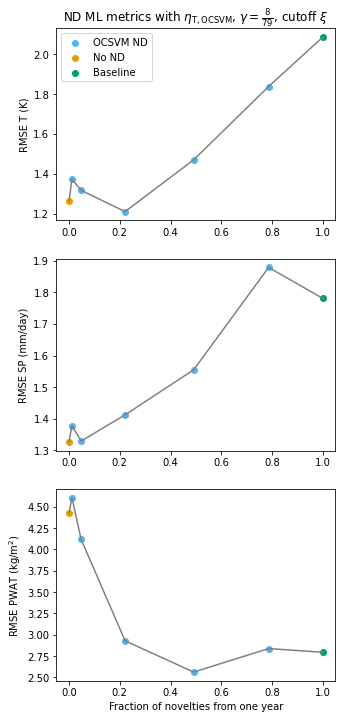

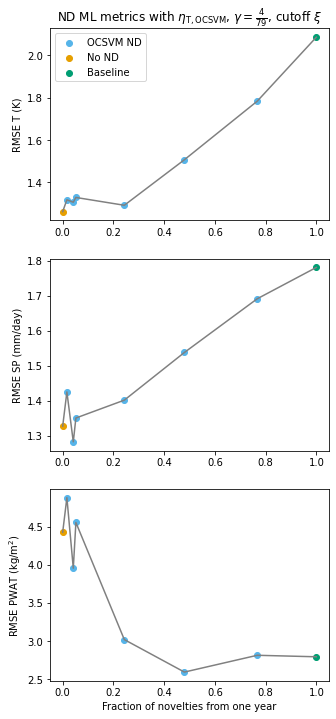

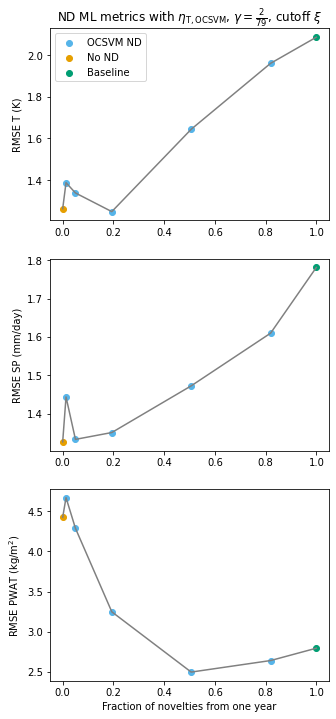

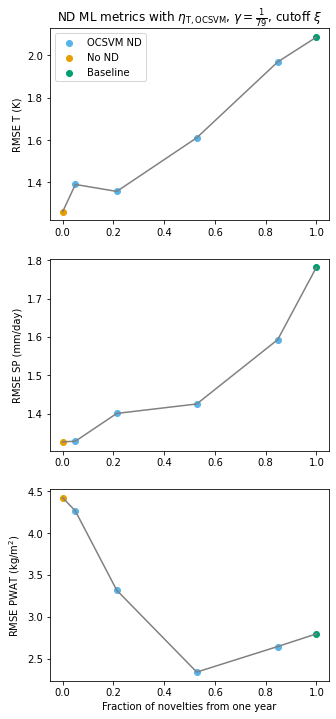

In [22]:
multiple_parameter_plots(True, False)

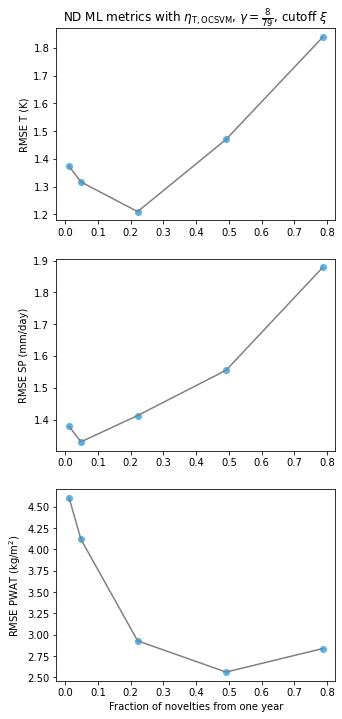

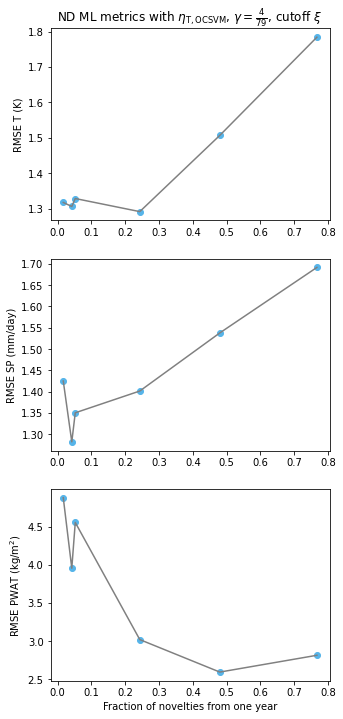

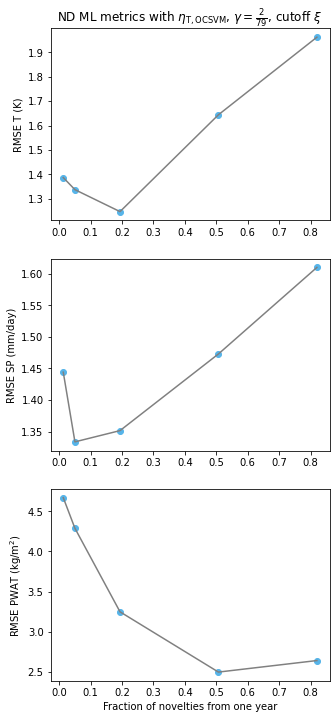

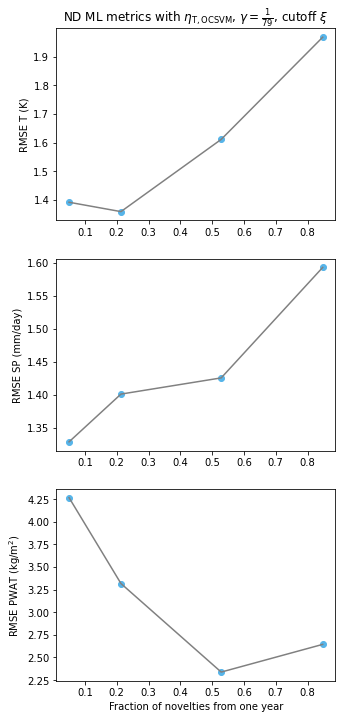

In [23]:
multiple_parameter_plots(False, False)

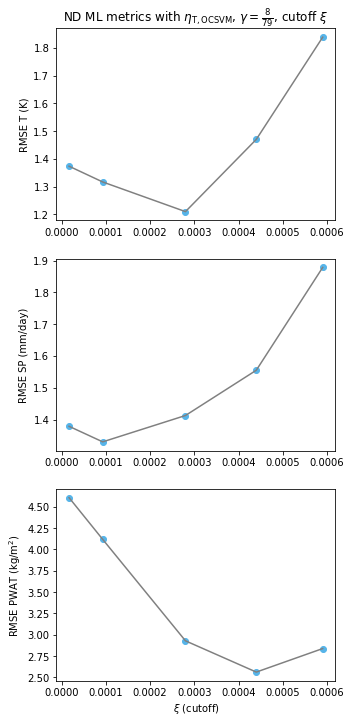

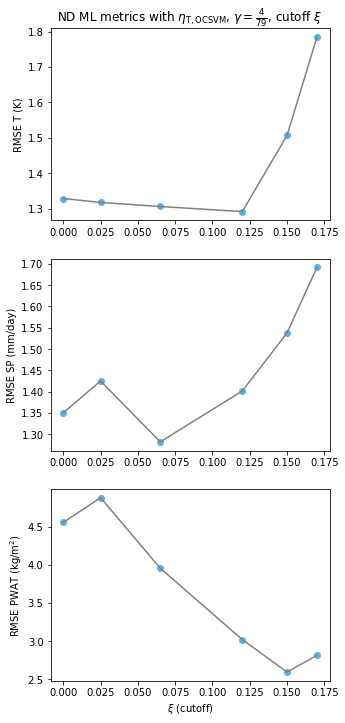

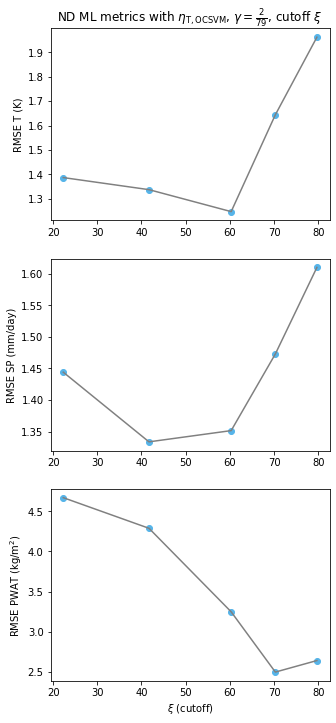

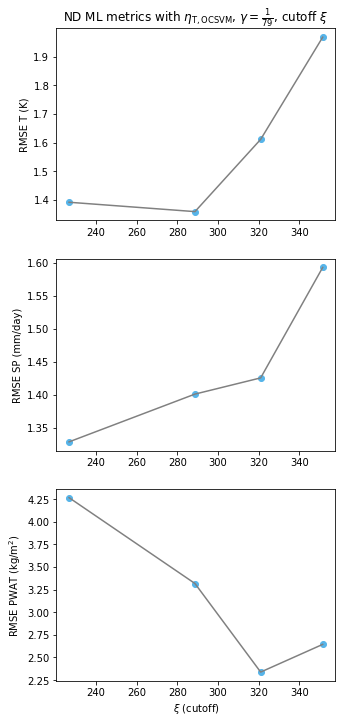

In [24]:
multiple_parameter_plots(False, True)